In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import SGD
from sklearn.neural_network import MLPRegressor
%matplotlib inline 
sns.set(style="ticks")

## Загрузка данных

In [2]:
# Загрузим все наши преобразованные данные
Data_natural = pd.read_csv('Data_natural.csv')
Data_scaled_test_1 = pd.read_csv('data_cs12_scaled_test.csv')
Data_scaled_train_1 = pd.read_csv('data_cs12_scaled_train.csv')
Data_scaled_test_2 = pd.read_csv('data_cs22_scaled_test.csv')
Data_scaled_train_2 = pd.read_csv('data_cs22_scaled_train.csv')
Data_scaled_test_y=pd.read_csv('data_cs22_scaled_test_y.csv')
Data_scaled_train_y=pd.read_csv('data_cs22_scaled_train_y.csv')

In [3]:
# ВО всех датафреймах загрузился столбец лишний с номером. Удалим его сразу
Data_natural = Data_natural.drop('Unnamed: 0', axis=1)
Data_scaled_test_1= Data_scaled_test_1.drop('Unnamed: 0', axis=1)
Data_scaled_train_1= Data_scaled_train_1.drop('Unnamed: 0', axis=1)
Data_scaled_train_2= Data_scaled_train_2.drop('Unnamed: 0', axis=1)
Data_scaled_test_2= Data_scaled_test_2.drop('Unnamed: 0', axis=1)
Data_scaled_test_y= Data_scaled_test_y.drop('Unnamed: 0', axis=1)
Data_scaled_train_y= Data_scaled_train_y.drop('Unnamed: 0', axis=1)

In [4]:
# Выделим зависимую переменную
Y= Data_natural['Прибыль в расчете на 1 работника']
# DataFrame не содержащий целевой признак
X_ALL = Data_natural.drop('Прибыль в расчете на 1 работника', axis=1)

In [5]:
# Разбиваем датасет на train/test исходные данные без стандартизации
X_train, X_test, y_train, y_test = train_test_split(X_ALL, Y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [6]:
X_train

Возраст компании, лет  Чистые активы на 1 работника  \
7899                    18.0                  7.199524e+05   
6541                    21.5                  1.266667e+04   
1085                    17.5                  5.538439e+06   
5338                     5.0                  1.508467e+06   
4249                     3.5                  4.041769e+06   
...                      ...                           ...   
13123                   19.0                  7.519571e+06   
3264                     7.0                  7.140588e+05   
9845                    11.5                  1.767647e+05   
10799                    8.0                  2.365263e+06   
2732                     6.5                  4.671714e+06   

       Налоговая нагрузка  Налоги на 1 работника  \
7899             0.047735           76834.952381   
6541             0.070939          100567.333333   
1085             0.019599          117987.365854   
5338             0.049273          162382.000000   
4249             0.018113          102816.076923   
...                   ...                    ...   
13123            0.032875           64622.571429   
3264             0.100310          265722.092437   
9845             0.077899          192937.235294   
10799            0.009425           76336.210526   
2732             0.058808          120422.000000   

       Кредиторская задолженность на 1 работника  Фондовооруженность  \
7899                                8.700000e+04        1.194762e+05   
6541                                1.666667e+06        4.680000e+05   
1085                                4.608780e+05        3.833659e+06   
5338                                8.073333e+05        1.136333e+06   
4249                                3.284332e+06        6.645923e+06   
...                                          ...                 ...   
13123                               2.525143e+06        3.681571e+06   
3264                                1.022034e+06        3.562092e+06   
9845                                2.452941e+04        2.182941e+05   
10799                               3.284332e+06        4.092895e+06   
2732                                3.284332e+06        5.240714e+06   

       Доля внеоборотных активов в общих  \
7899                            0.125790   
6541                            0.848371   
1085                            0.484015   
5338                            0.395366   
4249                            0.244157   
...                                  ...   
13123                           0.303471   
3264                            0.578956   
9845                            0.656930   
10799                           0.370340   
2732                            0.531397   

       2021, Коэффициент оборачиваемости совокупных активов, %  \
7899                                              1.8318         
6541                                              0.1056         
1085                                              0.8801         
5338                                              1.3383         
4249                                              0.2674         
...                                                  ...         
13123                                             0.1659         
3264                                              0.4708         
9845                                              2.3514         
10799                                             1.9448         
2732                                              0.2503         

       2021, Соотношение чистого долга к капиталу, %  \
7899                                        -0.40680   
6541                                         1.01425   
1085                                         0.33830   
5338                                         0.18320   
4249                                         1.01425   
...                                              ...   
13123                                        0.27760   
32

In [7]:
Data_natural

Прибыль в расчете на 1 работника  Возраст компании, лет  \
0                          7.700000e+04                    4.5   
1                         -2.612500e+05                    3.5   
2                          5.550000e+04                   20.5   
3                          1.456538e+06                    7.5   
4                         -2.570000e+05                   17.5   
...                                 ...                    ...   
15010                      1.198224e+06                   14.5   
15011                      2.217896e+06                   14.5   
15012                      2.819471e+06                   17.0   
15013                      2.819471e+06                    5.0   
15014                      2.819471e+06                   11.5   

       Чистые активы на 1 работника  Налоговая нагрузка  \
0                      1.000000e+04            0.174699   
1                      7.007500e+05            0.040449   
2                      4.197500e+05            0.096504   
3                      2.005769e+06            0.027554   
4                     -5.690000e+05            0.208271   
...                             ...                 ...   
15010                  8.082203e+06            0.108466   
15011                  4.306684e+06            0.056203   
15012                  4.420152e+06            0.054655   
15013                  1.387943e+07            0.009425   
15014                  6.315567e+06            0.026601   

       Налоги на 1 работника  Кредиторская задолженность на 1 работника  \
0              272007.000000                               2.516000e+06   
1               73576.000000                               4.970000e+05   
2               97397.000000                               2.202500e+05   
3              155220.846154                               2.267923e+06   
4              116484.000000                               2.340000e+06   
...                      ...                                        ...   
15010          347564.847059                               3.133647e+05   
15011          253901.149306                               1.051132e+06   
15012          441045.066789                               1.241811e+06   
15013          111197.250000                               7.850000e+04   
15014          201667.161189                               1.958681e+06   

       Фондовооруженность  Доля внеоборотных активов в общих  \
0            0.000000e+00                           0.000000   
1            1.941250e+06                           0.684081   
2            0.000000e+00                           0.000000   
3            1.767154e+06                           0.342942   
4            2.787000e+06                           0.848371   
...                   ...                                ...   
15010        3.335250e+06                           0.435057   
15011        2.898260e+06                           0.427907   
15012        3.016581e+06                           0.649371   
15013        8.748012e+06                           0.605623   
15014        4.908662e+06                           0.490859   

       2021, Коэффициент оборачиваемости совокупных активов, %  \
0                                                 0.3088         
1                                                 0.6926         
2                                                 1.5453         
3                                                 1.4180         
4                                                 0.0825         
...                                                  ...         
15010                                             0.3614         
15011                                             0.6418         
15012                                             0.6980         
15013                                             0.6844         
15014                                             0.5729         

       2021, Соотношение чистого долга к к

## Подбор модели

In [8]:
# Cоздадим списки для хранения моделей
MAE_y=[]
R2_y=[]
MAPE_y=[]

## RandomForestRegressor

In [9]:
# модель регрессии RandomForestRegressor
# На вход данные без стандартизации  'min_samples_split': [2, 3, 4], 
# params = {'n_estimators': [50,100,150], 'max_depth': [2,3,4], 'min_samples_leaf': [1,2,3,4,5],'criterion':  ['squared_error', 'absolute_error'],'max_features': ['sqrt', 'log2']}
params = {'max_features': ['sqrt', 'log2'],'max_depth': [2,3,4,5,6,7], 'min_samples_leaf': [1,2,3,4,5]}
grid_search_cv = GridSearchCV(RandomForestRegressor(), params)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)                           


{'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1}
0.8262147699307837


In [10]:
model_RF = RandomForestRegressor(**grid_search_cv.best_params_)
model_RF.fit(X_train, y_train)
pred_RF = model_RF.predict(X_test)
MAE_RF=mean_absolute_error(y_test, pred_RF)
R2_RF =r2_score(y_test, pred_RF)
MAPE_RF=mean_absolute_percentage_error(y_test, pred_RF)
# Оцениваем точность модели
print('MAE:', MAE_RF) 
print('R2:',R2_RF)
print('MAPE:',MAPE_RF)

MAE: 283004.27016361454
R2: 0.8189953408425515
MAPE: 2.42425754280867


In [11]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['RandomForestRegressor',MAE_RF])
R2_y.append(['RandomForestRegressor',R2_RF])
MAPE_y.append(['RandomForestRegressor',MAPE_RF])

In [14]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(model_RF, X_train, y_train, cv=3))

[0.82580872 0.82757901 0.82669984]


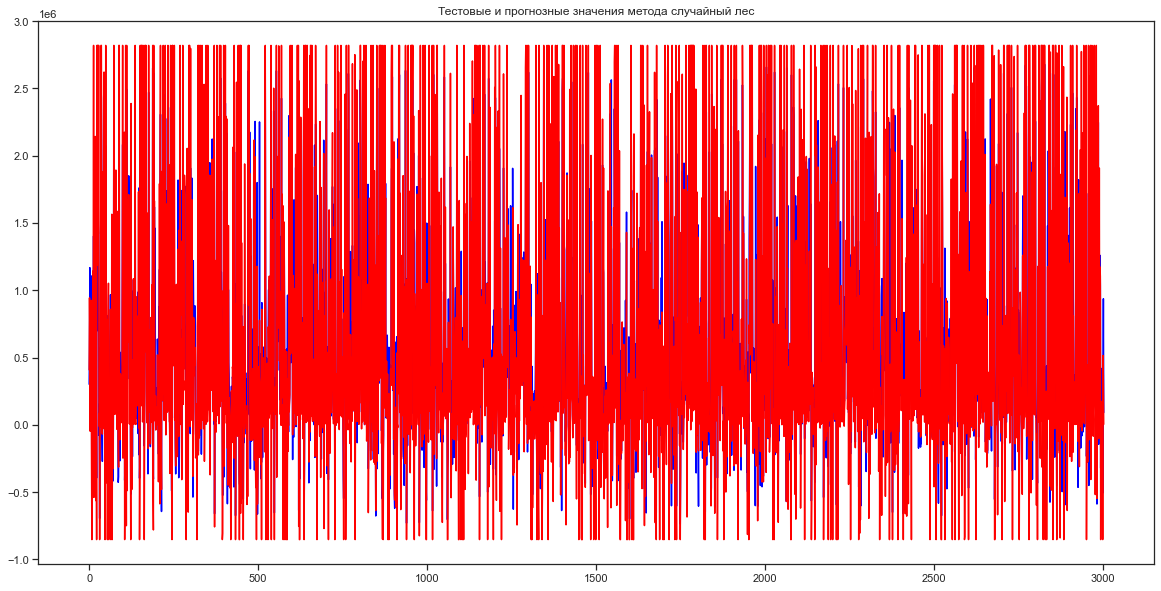

In [15]:
# Визуализируем полученные результаты работы модели:
plt.figure(figsize = (20, 10))
plt.title("Тестовые и прогнозные значения метода случайный лес")
plt.plot(pred_RF, label = "Прогноз", color = 'blue')
plt.plot(y_test.values, label = "Тест", color = 'red')

## DecisionTreeRegressor

In [16]:

# На вход данные без стандартизации  'min_samples_split': [2, 3, 4], 
# params = {'n_estimators': [50,100,150], 'max_depth': [2,3,4], 'min_samples_leaf': [1,2,3,4,5],'criterion':  ['squared_error', 'absolute_error'],'max_features': ['sqrt', 'log2']}
params = {'max_features': ['sqrt', 'log2'],'max_depth': [2,3,4,5], 'min_samples_leaf': [1,2,3,4,5]}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(), params)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)    

{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 5}
0.6346875053390445


In [17]:
model_DT = DecisionTreeRegressor(**grid_search_cv.best_params_)
model_DT.fit(X_train, y_train)
pred_DT = model_DT.predict(X_test)
MAE_DT=mean_absolute_error(y_test, pred_DT)
R2_DT =r2_score(y_test, pred_DT)
MAPE_DT=mean_absolute_percentage_error(y_test, pred_DT)
# Оцениваем точность модели
print('MAE:', MAE_DT) 
print('R2:',R2_DT)
print('MAPE:',MAPE_DT)

MAE: 473680.7461711661
R2: 0.5628092497388824
MAPE: 4.852324955942169


[Text(0.47708333333333336, 0.9166666666666666, 'X[2] <= 0.069\nsquared_error = 1083173288212.744\nsamples = 12012\nvalue = 648237.942'),
 Text(0.22083333333333333, 0.75, 'X[8] <= -0.76\nsquared_error = 1131362710942.558\nsamples = 7352\nvalue = 937235.282'),
 Text(0.10833333333333334, 0.5833333333333334, 'X[1] <= 2616884.625\nsquared_error = 656094532180.128\nsamples = 588\nvalue = 257116.92'),
 Text(0.06666666666666667, 0.4166666666666667, 'X[9] <= -0.348\nsquared_error = 487788953320.71\nsamples = 557\nvalue = 172603.292'),
 Text(0.03333333333333333, 0.25, 'X[4] <= 2251097.625\nsquared_error = 483960294209.404\nsamples = 183\nvalue = -13725.422'),
 Text(0.016666666666666666, 0.08333333333333333, 'squared_error = 466810420903.328\nsamples = 148\nvalue = 80401.37'),
 Text(0.05, 0.08333333333333333, 'squared_error = 360593831746.744\nsamples = 35\nvalue = -411747.288'),
 Text(0.1, 0.25, 'X[6] <= 0.302\nsquared_error = 464362210227.143\nsamples = 374\nvalue = 263774.829'),
 Text(0.083333

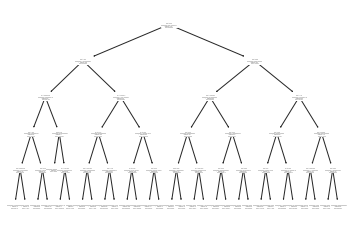

In [18]:
from sklearn import tree
tree.plot_tree(model_DT)

In [27]:
# Выгружаем график в хорошем качестве
#conda install python-graphviz
from sklearn.tree import export_graphviz
export_graphviz(model_DT, out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

In [19]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['DecisionTreeRegressor',MAE_DT])
R2_y.append(['DecisionTreeRegressor',R2_DT])
MAPE_y.append(['DecisionTreeRegressor',MAPE_DT])

In [20]:
print(cross_val_score(model_DT, X_train, y_train, cv=3))

[0.69102875 0.61854022 0.63889992]


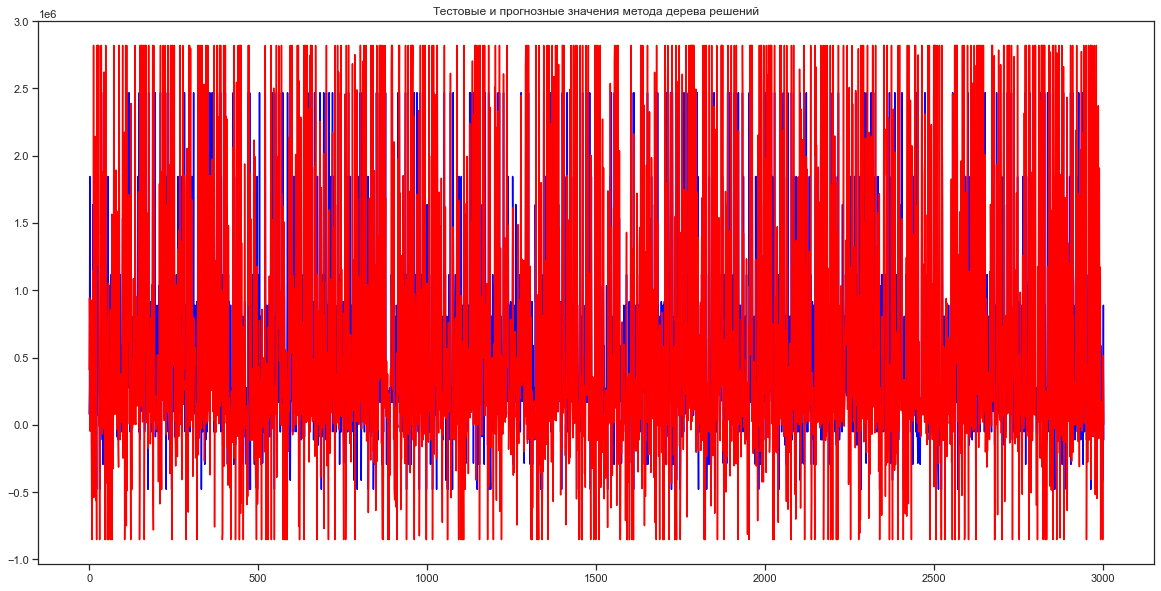

In [21]:
# Визуализируем полученные результаты работы модели:
plt.figure(figsize = (20, 10))
plt.title("Тестовые и прогнозные значения метода дерева решений")
plt.plot(pred_DT, label = "Прогноз", color = 'blue')
plt.plot(y_test.values, label = "Тест", color = 'red')

## HistGradientBoostingRegressor

In [22]:
# модель регрессии GradientBoostingRegressor
# На вход данные без стандартизации  'min_samples_split': [2, 3, 4], 
# params = {'n_estimators': [50,100,150], 'max_depth': [2,3,4], 'min_samples_leaf': [1,2,3,4,5],'criterion':  ['squared_error', 'absolute_error'],'max_features': ['sqrt', 'log2']}
params = {'max_depth': [2,3,4,5], 'max_leaf_nodes': list(range(2, 10))}
grid_search_cv = GridSearchCV(HistGradientBoostingRegressor(), params)
grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)    

{'max_depth': 5, 'max_leaf_nodes': 9}
0.8769531081432342


In [23]:
    # модель регрессии GradientBoostingRegressor
    model_HGB = HistGradientBoostingRegressor(**grid_search_cv.best_params_)
    model_HGB.fit(X_train, y_train)
    pred_HGB = model_HGB.predict(X_test)
    MAE_HGB=mean_absolute_error(y_test, pred_HGB)
    R2_HGB =r2_score(y_test, pred_HGB)
    MAPE_HGB=mean_absolute_percentage_error(y_test, pred_HGB)
    # Оцениваем точность модели
    print('MAE:', MAE_HGB) 
    print('R2:',R2_HGB)
    print('MAPE:',MAPE_HGB)

MAE: 228120.19546105067
R2: 0.8696039513347438
MAPE: 2.8583285780658905


In [24]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['HistGradientBoostingRegressor',MAE_HGB])
R2_y.append(['HistGradientBoostingRegressor',R2_HGB])
MAPE_y.append(['HistGradientBoostingRegressor',MAPE_HGB])

In [26]:
print(cross_val_score(model_HGB, X_train, y_train, cv=3))

[0.87846763 0.88132051 0.86644978]


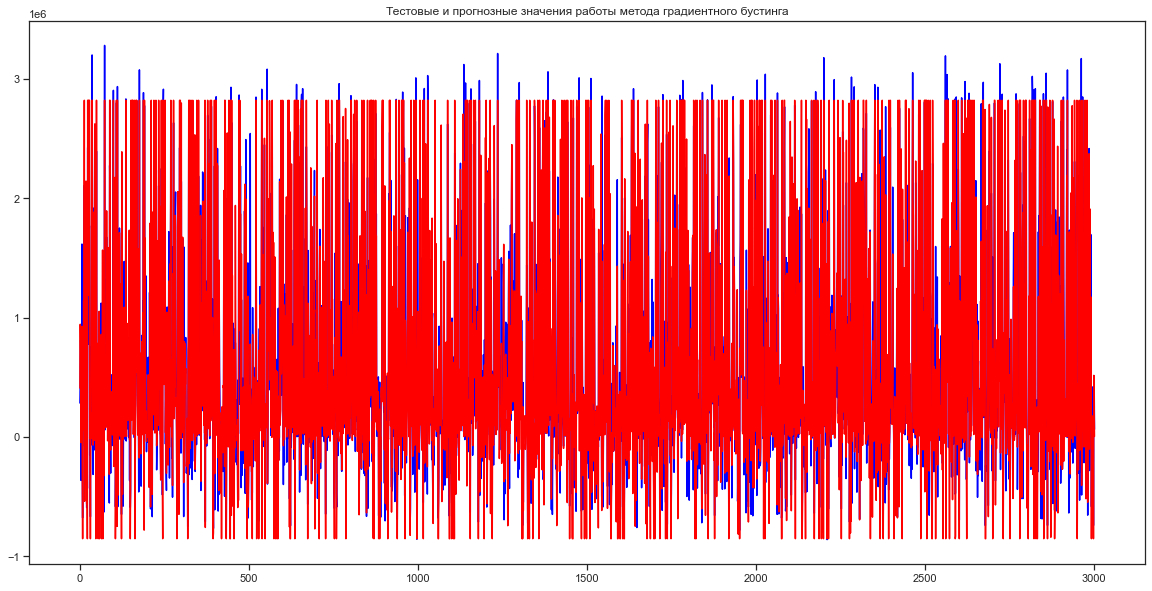

In [25]:
# Визуализируем полученные результаты работы модели:
plt.figure(figsize = (20, 10))
plt.title("Тестовые и прогнозные значения работы метода градиентного бустинга")
plt.plot(pred_HGB, label = "Прогноз", color = 'blue')
plt.plot(y_test.values, label = "Тест", color = 'red')

## KNeighborsRegressor

StandardScaler

In [27]:
# модель регрессии KNeighborsRegressor
# На вход данные без стандартизации  'min_samples_split': [2, 3, 4], 
# params = {'n_estimators': [50,100,150], 'max_depth': [2,3,4], 'min_samples_leaf': [1,2,3,4,5],'criterion':  ['squared_error', 'absolute_error'],'max_features': ['sqrt', 'log2']}
params = {'n_neighbors': list(range(3, 7)), 'leaf_size':list(range(25, 40))}
grid_search_cv = GridSearchCV(KNeighborsRegressor(), params)
grid_search_cv.fit(Data_scaled_train_1, Data_scaled_train_y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)   

{'leaf_size': 25, 'n_neighbors': 6}
0.7942237740716405


In [28]:
# модель регрессии KNeighborsRegressor
model_KN= KNeighborsRegressor(**grid_search_cv.best_params_)
model_KN.fit(Data_scaled_train_1, Data_scaled_train_y)
pred_KN = model_KN.predict(Data_scaled_test_1)
MAE_KN=mean_absolute_error(Data_scaled_test_y, pred_KN)
R2_KN =r2_score(Data_scaled_test_y, pred_KN)
MAPE_KN=mean_absolute_percentage_error(Data_scaled_test_y, pred_KN)
# Оцениваем точность модели
print('MAE:', MAE_KN) 
print('R2:',R2_KN)
print('MAPE:',MAPE_KN)

MAE: 293499.76760809514
R2: 0.773839313763896
MAPE: 2.7488765325224436


In [29]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['KNeighborsRegressor',MAE_KN])
R2_y.append(['KNeighborsRegressor',R2_KN])
MAPE_y.append(['KNeighborsRegressor',MAPE_KN])

In [31]:
print(cross_val_score(model_KN, Data_scaled_train_1, Data_scaled_train_y, cv=3))

[0.7711354  0.78785216 0.8011384 ]


MeanNormalisation

In [32]:
# модель регрессии KNeighborsRegressor
# На вход данные без стандартизации  'min_samples_split': [2, 3, 4], 
# params = {'n_estimators': [50,100,150], 'max_depth': [2,3,4], 'min_samples_leaf': [1,2,3,4,5],'criterion':  ['squared_error', 'absolute_error'],'max_features': ['sqrt', 'log2']}
params = {'n_neighbors': list(range(3, 7)), 'leaf_size':list(range(25, 40))}
grid_search_cv = GridSearchCV(KNeighborsRegressor(), params)
grid_search_cv.fit(Data_scaled_train_2, Data_scaled_train_y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)   

{'leaf_size': 25, 'n_neighbors': 6}
0.7821291058846807


In [34]:
# модель регрессии KNeighborsRegressor
model_KN2= KNeighborsRegressor(**grid_search_cv.best_params_)
model_KN2.fit(Data_scaled_train_2, Data_scaled_train_y)
pred_KN2 = model_KN2.predict(Data_scaled_test_2)
MAE_KN2=mean_absolute_error(Data_scaled_test_y, pred_KN2)
R2_KN2 =r2_score(Data_scaled_test_y, pred_KN2)
MAPE_KN2=mean_absolute_percentage_error(Data_scaled_test_y, pred_KN2)
# Оцениваем точность модели
print('MAE:', MAE_KN2) 
print('R2:',R2_KN2)
print('MAPE:',MAPE_KN2)

MAE: 305743.8430911457
R2: 0.7570737457953616
MAPE: 2.6752949453851333


In [35]:
# записываем данные о показателях качества в итоговую таблицу
MAE_y.append(['KNeighborsRegressor2',MAE_KN2])
R2_y.append(['KNeighborsRegressor2',R2_KN2])
MAPE_y.append(['KNeighborsRegressor2',MAPE_KN2])

In [36]:
print(cross_val_score(model_KN2, Data_scaled_train_2, Data_scaled_train_y, cv=3))

[0.76337789 0.77376231 0.78881767]


In [108]:
Data_scaled_train_1.shape

(12012, 12)

In [38]:
print(MAE_y)
print(R2_y)
print(MAPE_y)

[['RandomForestRegressor', 283004.27016361454], ['DecisionTreeRegressor', 473680.7461711661], ['HistGradientBoostingRegressor', 228120.19546105067], ['KNeighborsRegressor', 293499.76760809514], ['KNeighborsRegressor2', 305743.8430911457]]
[['RandomForestRegressor', 0.8189953408425515], ['DecisionTreeRegressor', 0.5628092497388824], ['HistGradientBoostingRegressor', 0.8696039513347438], ['KNeighborsRegressor', 0.773839313763896], ['KNeighborsRegressor2', 0.7570737457953616]]
[['RandomForestRegressor', 2.42425754280867], ['DecisionTreeRegressor', 4.852324955942169], ['HistGradientBoostingRegressor', 2.8583285780658905], ['KNeighborsRegressor', 2.7488765325224436], ['KNeighborsRegressor2', 2.6752949453851333]]


In [39]:
#  результаты MAE
a = np.array(MAE_y)
b = np.array(R2_y)
c = np.array(MAPE_y)
Mod_errors = pd.DataFrame({'Модель регрессии': a[:,0], 'MAE': a[:,1], 
                             'R2': b[:,1], 'MAPE': c[:,1]})
Mod_errors

Модель регрессии                 MAE                  R2  \
0          RandomForestRegressor  283004.27016361454  0.8189953408425515   
1          DecisionTreeRegressor   473680.7461711661  0.5628092497388824   
2  HistGradientBoostingRegressor  228120.19546105067  0.8696039513347438   
3            KNeighborsRegressor  293499.76760809514   0.773839313763896   
4           KNeighborsRegressor2   305743.8430911457  0.7570737457953616   

                 MAPE  
0    2.42425754280867  
1   4.852324955942169  
2  2.8583285780658905  
3  2.7488765325224436  
4  2.6752949453851333

In [40]:
Mod_errors['MAE']=pd.to_numeric(Mod_errors['MAE'], downcast="integer")
Mod_errors['R2']=pd.to_numeric(Mod_errors['R2'], downcast="integer")
Mod_errors['MAPE']=pd.to_numeric(Mod_errors['MAPE'], downcast="integer")

In [41]:
Mod_errors

Модель регрессии            MAE        R2      MAPE
0          RandomForestRegressor  283004.270164  0.818995  2.424258
1          DecisionTreeRegressor  473680.746171  0.562809  4.852325
2  HistGradientBoostingRegressor  228120.195461  0.869604  2.858329
3            KNeighborsRegressor  293499.767608  0.773839  2.748877
4           KNeighborsRegressor2  305743.843091  0.757074  2.675295

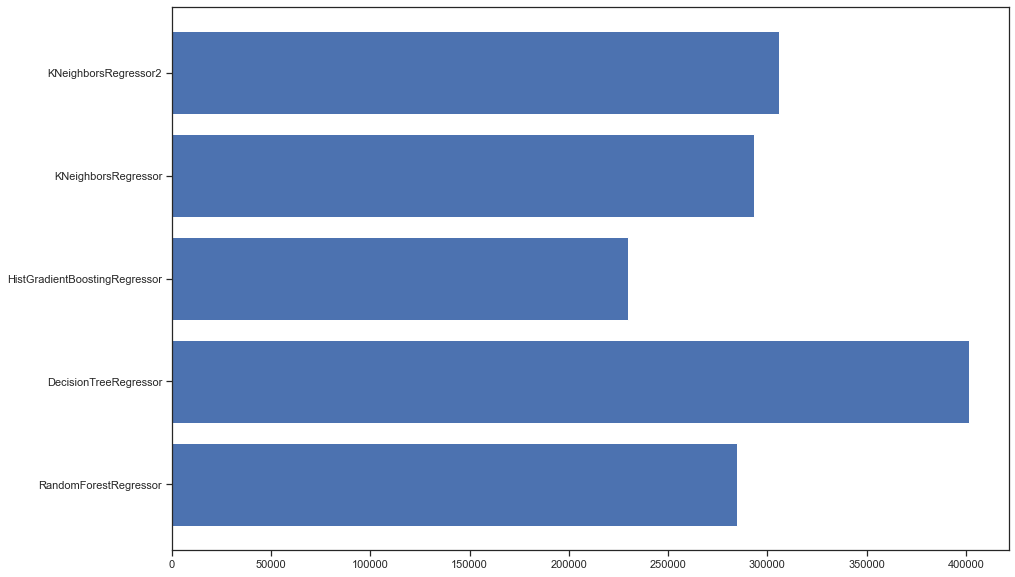

In [81]:

# Построим гистограмму ошибки
plt.figure(figsize=(15, 10))
plt.barh(Mod_errors['Модель регрессии'], Mod_errors['MAE'])
plt.show()

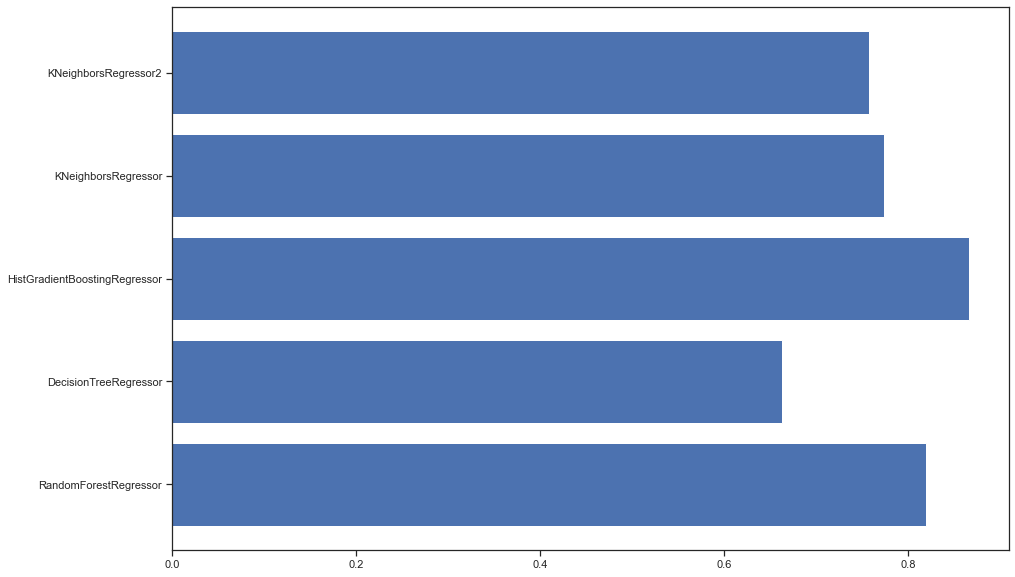

In [82]:
# Построим гистограмму ошибки
plt.figure(figsize=(15, 10))
plt.barh(Mod_errors['Модель регрессии'], Mod_errors['R2'])
plt.show()

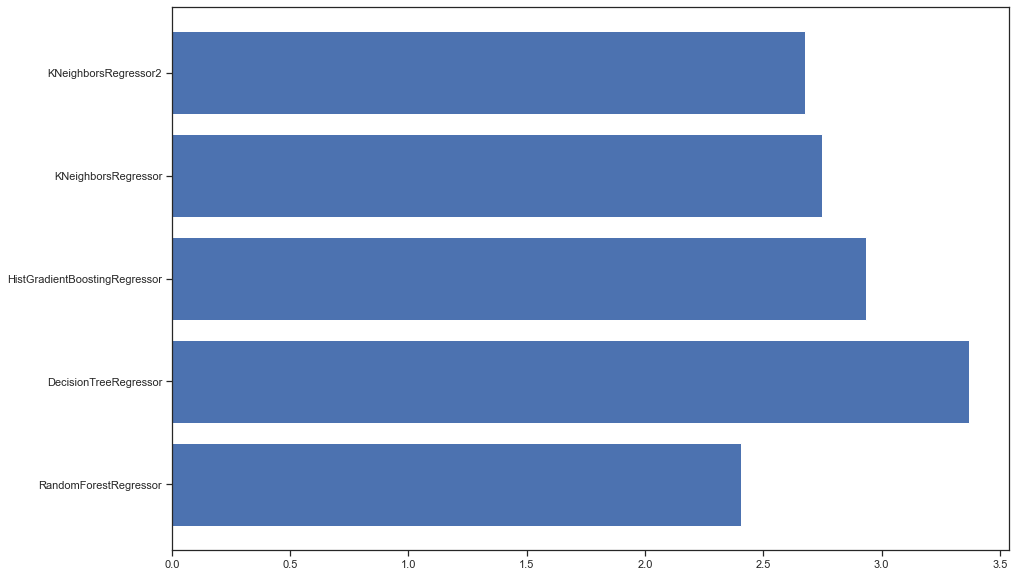

In [83]:
# Построим гистограмму ошибки
plt.figure(figsize=(15, 10))
plt.barh(Mod_errors['Модель регрессии'], Mod_errors['MAPE'])
plt.show()

# Полносвязная нейронная сеть

In [7]:
#создание метрики R2
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_183 (Dense)           (None, 64)                832       
                                                                 
 dropout_83 (Dropout)        (None, 64)                0         
                                                                 
 dense_184 (Dense)           (None, 32)                2080      
                                                                 
 dense_185 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
301/301 - 2s - loss: 1536985530368.0000 - mae: 828494.3750 - coeff_determination: -4.2530e-01 - val_loss: 1460102365184.0000 - val_mae: 814847.3125 - val_coeff_determinati

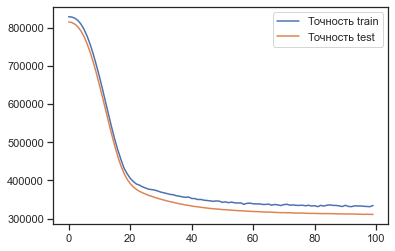

In [61]:
# модель полносвязной нейронной сети для целевого параметра y1 relu выпрямленная линейная единица.
#ReLU математически определяется как F (x) = max (0, x). Другими словами, на выходе будет x, если x больше 0, и на выходе 0, если x равен 0 или отрицателен.
modelNN_y1 = Sequential()
modelNN_y1.add(Dense(64, input_dim=12, activation = 'relu'))
modelNN_y1.add(Dropout(0.3))
modelNN_y1.add(Dense(32, activation = 'relu'))
modelNN_y1.add(Dense(1, activation = 'relu'))
#modelNN_y1.compile(optimizer='rmsprop', loss='mse', metrics=[coeff_determination])
modelNN_y1.compile(optimizer='adam', loss='mse', metrics=['mae', coeff_determination])
modelNN_y1.summary()
history = modelNN_y1.fit(Data_scaled_train_1,Data_scaled_train_y, 
                    epochs=100, 
                    validation_split=0.2, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [62]:
y_pred1 = modelNN_y1.predict(Data_scaled_test_1)
MAEmodel_1 = mean_absolute_error(Data_scaled_test_y.iloc[:,0],y_pred1[:,0])
print (MAEmodel_1)
R2model_1 = r2_score(Data_scaled_test_y.iloc[:,0],y_pred1[:,0])
print (R2model_1)

94/94 [==============================] - 0s 2ms/step
320294.23673254414
0.7680048166559368


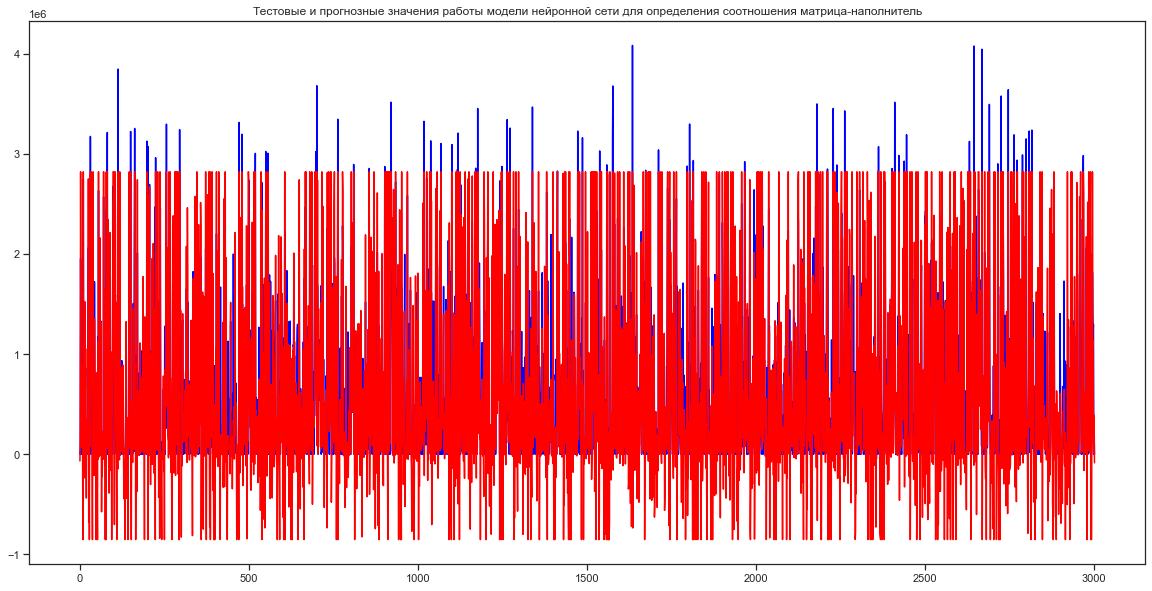

In [60]:
# Визуализация модели 
ns = MAEmodel_1
# Визуализируем полученные результаты работы модели K-Neighbors Regressor:
plt.figure(figsize = (20, 10))
plt.title("Тестовые и прогнозные значения работы модели K-Neighbors Regressor")
plt.plot(y_pred1, label = "Прогноз", color = 'blue')
plt.plot(Data_scaled_test_y.values, label = "Тест", color = 'red')
#plt.xlabel("Порядок")
#plt.ylabel("х")
#plt.legend()
#plt.grid(True)

## Нейронная сеть 2

In [71]:
#тестовая нейронная сеть
import tensorflow as tf

normalizer = tf.keras.layers.Normalization(axis=1)
normalizer.adapt(np.array(Data_scaled_train_1))

def build_and_compile_model(norm):
    model = tf.keras.Sequential([
        norm,
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(1)
    ])
    
    model.compile(loss = 'mean_absolute_error',
                  optimizer = tf.keras.optimizers.Adam(0.001))
    return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_64 (Dense)            (None, 64)                832       
                                                                 
 dense_65 (Dense)            (None, 64)                4160      
                                                                 
 dense_66 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [72]:
history = dnn_model.fit(Data_scaled_train_1, Data_scaled_train_y, validation_split=0.2, verbose=0, epochs=100)

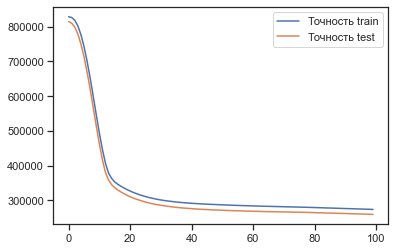

In [73]:
plt.plot(history.history['loss'], label = 'Точность train')
plt.plot(history.history['val_loss'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [65]:
y_pred1 = dnn_model.predict(Data_scaled_test_1)
MAEmodel_1 = mean_absolute_error(Data_scaled_test_y.iloc[:,0],y_pred1[:,0])
print (MAEmodel_1)
R2model_1 = r2_score(Data_scaled_test_y.iloc[:,0],y_pred1[:,0])
print (R2model_1)


94/94 [==============================] - 0s 1ms/step
270785.2024671523
0.8021870208113915


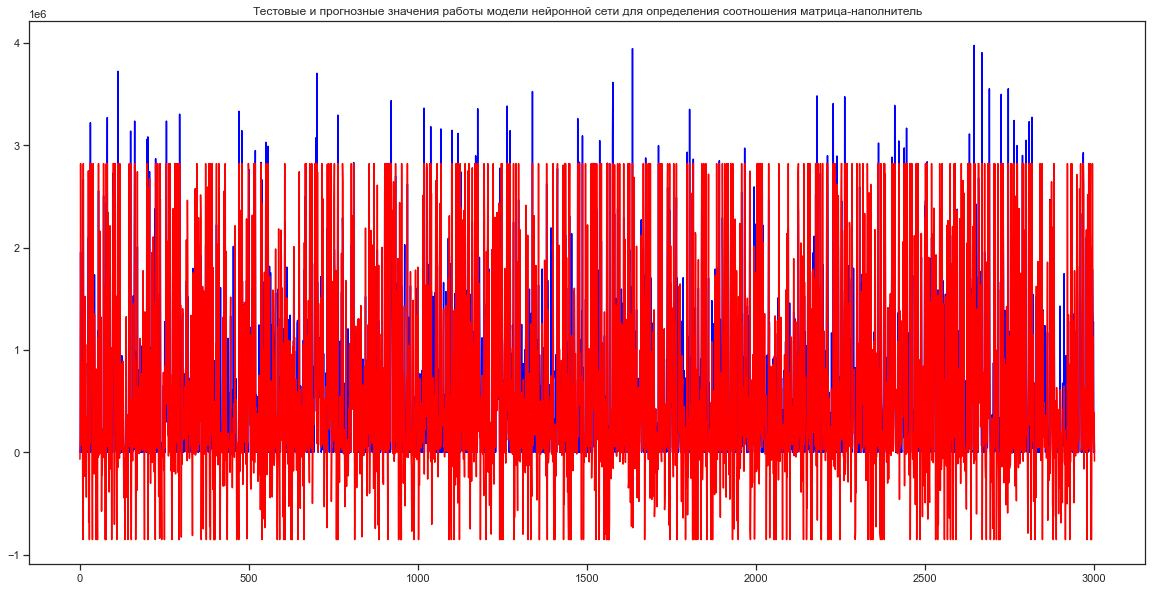

In [74]:
# Визуализация модели НС
# y_pred_ns = model.predict(x_test)
ns = MAEmodel_1
# Визуализируем полученные результаты работы модели НС:
plt.figure(figsize = (20, 10))
plt.title("Тестовые и прогнозные значения работы модели нейронной сети для определения соотношения матрица-наполнитель")
plt.plot(y_pred1, label = "Прогноз", color = 'blue')
plt.plot(Data_scaled_test_y.values, label = "Тест", color = 'red')
#plt.xlabel("Порядок")
#plt.ylabel("х")
#plt.legend()
#plt.grid(True)